## This notebook studies the pitches that Bryce Harper swung at outside of the strikezone in the 2019 regular season.  The study starts by narrowing the data to the regular season at bats and then divides all of the pitches into 4 quadrants.  Everything in the strikezone along with any pitch that were called a ball or strike or any pitch that was bunted or that hit Harper was eliminated.  This left all pitches that were pitches outside of the strikezone that Harper swung at.
## The outcome of each pitch in each quadrant was studied along with the proportion of each type of pitch thrown that resulted in each outcome.  If further analysis was necessary, that was done as well.

### Each pitch that Bryce Harper saw in 2019 was imported into the notebook

In [1]:
import pandas as pd
import numpy as np
harper = pd.read_csv(r'C:\Users\blync\Downloads\savant_data.csv')

In [2]:
import matplotlib as mpl
import matplotlib.pyplot as plt

### The data was then condensed to the statistics of interest

In [3]:
condensed_stats = harper[['pitch_type', 'release_speed', 'description', 'zone', 'game_type', 'p_throws', 'balls','strikes','plate_x','plate_z','launch_speed','launch_angle']]
condensed_stats

,pitch_type,release_speed,description,zone,game_type,p_throws,balls,strikes,plate_x,plate_z,launch_speed,launch_angle
0,FF,95.2,hit_into_play,5,R,L,1,1,0.1000,2.5694,105.7,39.9
1,FF,96.0,ball,11,R,L,0,1,-1.4587,2.4672,NaN,NaN
2,SL,84.8,swinging_strike,3,R,L,0,0,0.4238,3.0235,NaN,NaN
3,CU,72.1,swinging_strike,9,R,L,2,2,0.3351,1.8097,NaN,NaN
4,CU,73.4,swinging_strike,13,R,L,2,1,-1.3227,1.7442,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
2782,CU,78.1,blocked_ball,14,R,R,0,0,1.4873,0.3969,NaN,NaN
2783,SL,82.1,hit_into_play,4,R,R,2,1,-0.6497,2.2325,84.2,2.3
2784,SL,78.1,ball,14,R,R,1,1,0.9503,0.3945,NaN,NaN
2785,CU,78.1,ball,14,R,R,0,1,2.9309,-1.2318,NaN,NaN


### From these statistics, I wanted to focus on what Harper was swinging at during the 2019 regular season.  My main objective was to identify trends that Harper had with pitches outside the strikezone

In [4]:
condensed_stats.description.unique()

array(['hit_into_play', 'ball', 'swinging_strike', 'called_strike',
       'hit_into_play_no_out', 'hit_into_play_score', 'blocked_ball',
       'foul', 'hit_by_pitch', 'foul_bunt', 'swinging_strike_blocked',
       'foul_tip', 'missed_bunt'], dtype=object)

In [5]:
cd_stats = condensed_stats.loc[condensed_stats['game_type'] == 'R'] #Narrows dataset to only regular season games
cd_stats0 = cd_stats.loc[cd_stats['description'] != 'ball'] #Eliminates any pitches that were balls
cd_stats1 = cd_stats0.loc[cd_stats0['description'] != 'blocked_ball'] #Eliminates any pitches that were blocked balls
cd_stats15 = cd_stats1.loc[cd_stats1['description'] != 'called_strike']
cd_stats2 = cd_stats15.loc[cd_stats15['description'] != 'missed_bunt'] #Eliminates any pitches that were missed bunts
cd_stats3 = cd_stats2.loc[cd_stats2['description'] != 'foul_bunt'] #Eliminates any pitches that were foul bunts
cd_stats4 = cd_stats3.loc[cd_stats3['description'] != 'hit_by_pitch'] #Eliminates any pitches that were hit by pitches

(-0.5, 4.5)

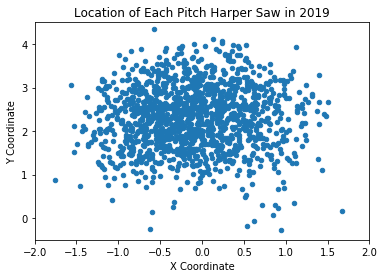

In [6]:
cd_stats4.plot(kind='scatter', x='plate_x', y='plate_z')
plt.title('Location of Each Pitch Harper Saw in 2019')
plt.xlabel('X Coordinate')
plt.ylabel('Y Coordinate')
plt.xlim(-2,2)
plt.ylim(-.5,4.5)

The total number of pitches Harper took as called strikes in 2019 in quadrant 1: 1
The total number of pitches Harper took as called strikes in 2019 in quadrant 2: 5
The total number of pitches Harper took as called strikes in 2019 in quadrant 3: 14
The total number of pitches Harper took as called strikes in 2019 in quadrant 4: 5
The total number of pitches Harper took as called strikes in 2019 above the strikezone: 3
The total number of pitches Harper took as called strikes in 2019 below the strikezone: 10


Text(0.5, 1.0, 'All Pitches Called Strikes to Harper in 2019')

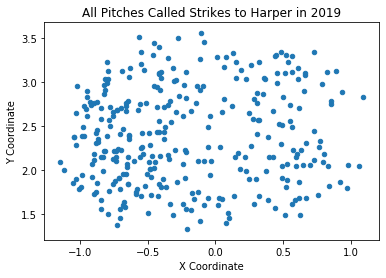

In [7]:
cd_stats30 = cd_stats.loc[cd_stats['description'] == 'called_strike'] #Eliminates any pitches that were balls
cs_above_zone = cd_stats30.loc[cd_stats30['plate_z']>3.5]
cs_below_zone = cd_stats30.loc[cd_stats30['plate_z']<1.5]
cs_outer_half = cd_stats30.loc[cd_stats30['plate_x'] <=0]
cs_out_up = cs_outer_half.loc[cs_outer_half['plate_z']>=2.5]
cs_out_down = cs_outer_half.loc[cs_outer_half['plate_z']<2.5]
cs_inner_half = cd_stats30.loc[cd_stats30['plate_x']>0]
cs_in_up = cs_inner_half.loc[cs_inner_half['plate_z']>=2.5]
cs_in_down = cs_inner_half.loc[cs_inner_half['plate_z']<2.5]

cs_in_up2 = cs_in_up.loc[(cs_in_up['plate_x']>1)] 
cs_in_up3 = cs_in_up.loc[(cs_in_up['plate_z']>3.5)]
cs_in_up4 = pd.concat([cs_in_up2, cs_in_up3])
cs_out_up2 = cs_out_up.loc[(cs_out_up['plate_x']<-1)] 
cs_out_up3 = cs_out_up.loc[(cs_out_up['plate_z']>3.5)]
cs_out_up4 = pd.concat([cs_out_up2, cs_out_up3])
cs_out_down2 = cs_out_down.loc[(cs_out_down['plate_x']<-1)] 
cs_out_down3 = cs_out_down.loc[(cs_out_down['plate_z']<1.5)]
cs_out_down4 = pd.concat([cs_out_down2, cs_out_down3])
cs_in_down2 = cs_in_down.loc[(cs_in_down['plate_x']>1)] 
cs_in_down3 = cs_in_down.loc[(cs_in_down['plate_z']<1.5)]
cs_in_down4 = pd.concat([cs_in_down2, cs_in_down3])

tcs1 = cs_in_up4.shape[0]
print('The total number of pitches Harper took as called strikes in 2019 in quadrant 1: ' + str(tcs1))
tcs2 = cs_out_up4.shape[0]
print('The total number of pitches Harper took as called strikes in 2019 in quadrant 2: ' + str(tcs2))
tcs3 = cs_out_down4.shape[0]
print('The total number of pitches Harper took as called strikes in 2019 in quadrant 3: ' + str(tcs3))
tcs4 = cs_in_down4.shape[0]
print('The total number of pitches Harper took as called strikes in 2019 in quadrant 4: ' + str(tcs4))
tcsaz = cs_above_zone.shape[0]
print('The total number of pitches Harper took as called strikes in 2019 above the strikezone: ' + str(tcsaz))
tcsbz = cs_below_zone.shape[0]
print('The total number of pitches Harper took as called strikes in 2019 below the strikezone: ' + str(tcsbz))

cd_stats30.plot(kind='scatter', x='plate_x', y='plate_z')
plt.xlabel('X Coordinate')
plt.ylabel('Y Coordinate')
plt.title('All Pitches Called Strikes to Harper in 2019')

### From this analysis of the strikes called on Harper in 2019, I was able to determine a strikezone for the study.  If the strikezone was defined as between -1 and 1 for x and between 1.5 and 3.5 for y, at least 95% of all pitches in each quadrant that were called strikes in 2019 would be defined as strikes.  

In [8]:
above_zone = cd_stats4.loc[cd_stats4['plate_z']>3.5]
below_zone = cd_stats4.loc[cd_stats4['plate_z']<1.5]
outer_half = cd_stats4.loc[cd_stats4['plate_x'] <=0]
out_up = outer_half.loc[outer_half['plate_z']>=2]
out_down = outer_half.loc[outer_half['plate_z']<2]
inner_half = cd_stats4.loc[cd_stats4['plate_x']>0]
in_up = inner_half.loc[inner_half['plate_z']>=2]
in_down = inner_half.loc[inner_half['plate_z']<2]

Text(0, 0.5, 'Y Coordinate')

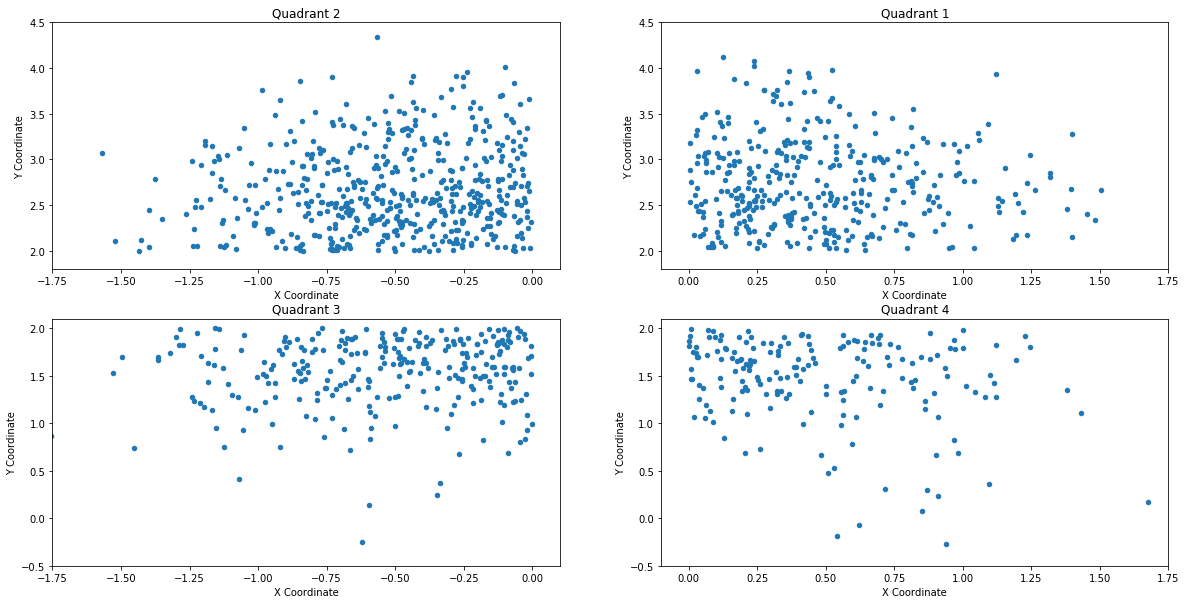

In [9]:
fig = plt.figure()

ax1 = fig.add_subplot(2, 2, 1) # add subplot 1 (2 row, 2 columns, first plot)
ax2 = fig.add_subplot(2, 2, 2)
ax3 = fig.add_subplot(2, 2, 3)
ax4 = fig.add_subplot(2, 2, 4)

out_up.plot(kind='scatter', x='plate_x', y='plate_z', figsize=(20, 10), ax = ax1)
ax1.set_xlim([-1.75, 0.1])
ax1.set_ylim([1.8, 4.5])
ax1.set_title('Quadrant 2')
ax1.set_xlabel('X Coordinate')
ax1.set_ylabel('Y Coordinate')
out_down.plot(kind='scatter', x='plate_x', y='plate_z', figsize=(20, 10), ax = ax3)
ax3.set_xlim([-1.75, 0.1])
ax3.set_ylim([-0.5, 2.1])
ax3.set_title('Quadrant 3')
ax3.set_xlabel('X Coordinate')
ax3.set_ylabel('Y Coordinate')
in_up.plot(kind='scatter', x='plate_x', y='plate_z', figsize=(20, 10), ax = ax2)
ax2.set_xlim([-0.1, 1.75])
ax2.set_ylim([1.8, 4.5])
ax2.set_title('Quadrant 1')
ax2.set_xlabel('X Coordinate')
ax2.set_ylabel('Y Coordinate')
in_down.plot(kind='scatter', x='plate_x', y='plate_z', figsize=(20, 10), ax = ax4)
ax4.set_xlim([-0.1, 1.75])
ax4.set_ylim([-0.5, 2.1])
ax4.set_title('Quadrant 4')
ax4.set_xlabel('X Coordinate')
ax4.set_ylabel('Y Coordinate')

### Starting with the pitches that were considered on the inner half and up, I first eliminated all of the data points that were in the strike zone.

### I formed a scatter plot of all the pitches Harper saw in 2019 and then divided the plot into four quandrants: high and in (quadrant 1), high out outside (quadrant 2), low and outside (quadrant 3), low and inside (quadrant 4)

(1.8, 4.5)

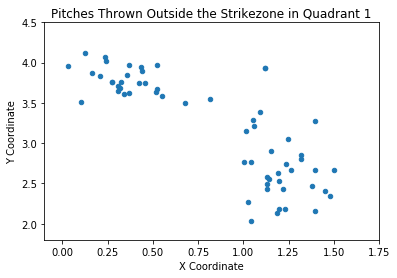

In [10]:
in_up2 = in_up.loc[(in_up['plate_x']>1)] 
in_up3 = in_up.loc[(in_up['plate_z']>3.5)]
in_up4 = pd.concat([in_up2, in_up3])
in_up4.plot(kind='scatter', x='plate_x', y='plate_z')
plt.title('Pitches Thrown Outside the Strikezone in Quadrant 1')
plt.xlabel('X Coordinate')
plt.ylabel('Y Coordinate')
plt.xlim(-0.1,1.75)
plt.ylim(1.8,4.5)

Text(0, 0.5, 'Y Coordinate')

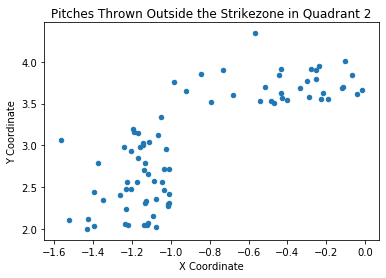

In [11]:
out_up2 = out_up.loc[(out_up['plate_x']<-1)] 
out_up3 = out_up.loc[(out_up['plate_z']>3.5)]
out_up4 = pd.concat([out_up2, out_up3])
out_up4.plot(kind='scatter', x='plate_x', y='plate_z')
plt.title('Pitches Thrown Outside the Strikezone in Quadrant 2')
plt.xlabel('X Coordinate')
plt.ylabel('Y Coordinate')

(-2, 0)

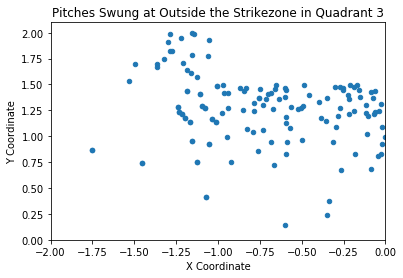

In [12]:
out_down2 = out_down.loc[(out_down['plate_x']<-1)] 
out_down3 = out_down.loc[(out_down['plate_z']<1.5)]
out_down4 = pd.concat([out_down2, out_down3])
out_down4.plot(kind='scatter', x='plate_x', y='plate_z')
plt.title('Pitches Swung at Outside the Strikezone in Quadrant 3')
plt.xlabel('X Coordinate')
plt.ylabel('Y Coordinate')
plt.ylim(0,2.1)
plt.xlim(-2,0)

Text(0, 0.5, 'Y Coordinate')

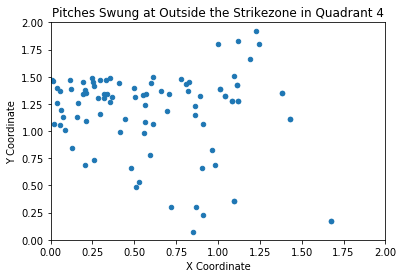

In [13]:
in_down2 = in_down.loc[(in_down['plate_x']>1)] 
in_down3 = in_down.loc[(in_down['plate_z']<1.5)]
in_down4 = pd.concat([in_down2, in_down3])
in_down4.plot(kind='scatter', x='plate_x', y='plate_z')
plt.xlim([0, 2])
plt.ylim([0, 2])
plt.title('Pitches Swung at Outside the Strikezone in Quadrant 4')
plt.xlabel('X Coordinate')
plt.ylabel('Y Coordinate')

In [14]:
tp1 = in_up4.shape[0]
print('The total number of pitches Harper swung at in 2019 in quadrant 1: ' + str(tp1))
tp2 = out_up4.shape[0]
print('The total number of pitches Harper swung at in 2019 in quadrant 2: ' + str(tp2))
tp3 = out_down4.shape[0]
print('The total number of pitches Harper swung at in 2019 in quadrant 3: ' + str(tp3))
tp4 = in_down4.shape[0]
print('The total number of pitches Harper swung at in 2019 in quadrant 4: ' + str(tp4))
tpaz = above_zone.shape[0]
print('The total number of pitches Harper swung at in 2019 above the strikezone: ' + str(tpaz))
tpbz = below_zone.shape[0]
print('The total number of pitches Harper swung at in 2019 below the strikezone: ' + str(tpbz))

The total number of pitches Harper swung at in 2019 in quadrant 1: 60
The total number of pitches Harper swung at in 2019 in quadrant 2: 81
The total number of pitches Harper swung at in 2019 in quadrant 3: 144
The total number of pitches Harper swung at in 2019 in quadrant 4: 97
The total number of pitches Harper swung at in 2019 above the strikezone: 60
The total number of pitches Harper swung at in 2019 below the strikezone: 189


In [15]:
cd_stats20 = cd_stats.loc[cd_stats['description'] == 'ball'] #Eliminates any pitches that were balls
ball_above_zone = cd_stats20.loc[cd_stats20['plate_z']>3.5]
ball_below_zone = cd_stats20.loc[cd_stats20['plate_z']<1.5]
ball_outer_half = cd_stats20.loc[cd_stats20['plate_x'] <=0]
ball_out_up = ball_outer_half.loc[ball_outer_half['plate_z']>=2.5]
ball_out_down = ball_outer_half.loc[ball_outer_half['plate_z']<2.5]
ball_inner_half = cd_stats20.loc[cd_stats20['plate_x']>0]
ball_in_up = ball_inner_half.loc[ball_inner_half['plate_z']>=2.5]
ball_in_down = ball_inner_half.loc[ball_inner_half['plate_z']<2.5]
ball_in_up2 = ball_in_up.loc[(ball_in_up['plate_x']>1)] 
ball_in_up3 = ball_in_up.loc[(ball_in_up['plate_z']>3.5)]
ball_in_up4 = pd.concat([ball_in_up2, ball_in_up3])
ball_out_up2 = ball_out_up.loc[(ball_out_up['plate_x']<-1)] 
ball_out_up3 = ball_out_up.loc[(ball_out_up['plate_z']>3.5)]
ball_out_up4 = pd.concat([ball_out_up2, ball_out_up3])
ball_out_down2 = ball_out_down.loc[(ball_out_down['plate_x']<-1)] 
ball_out_down3 = ball_out_down.loc[(ball_out_down['plate_z']<1.5)]
ball_out_down4 = pd.concat([ball_out_down2, ball_out_down3])
ball_in_down2 = ball_in_down.loc[(ball_in_down['plate_x']>1)] 
ball_in_down3 = ball_in_down.loc[(ball_in_down['plate_z']<1.5)]
ball_in_down4 = pd.concat([ball_in_down2, ball_in_down3])

tb1 = ball_in_up4.shape[0]
print('The total number of pitches Harper took as balls in 2019 in quadrant 1: ' + str(tb1))
tb2 = ball_out_up4.shape[0]
print('The total number of pitches Harper took as balls in 2019 in quadrant 2: ' + str(tb2))
tb3 = ball_out_down4.shape[0]
print('The total number of pitches Harper took as balls in 2019 in quadrant 3: ' + str(tb3))
tb4 = ball_in_down4.shape[0]
print('The total number of pitches Harper took as balls in 2019 in quadrant 4: ' + str(tb4))
tbaz = ball_above_zone.shape[0]
print('The total number of pitches Harper took as balls in 2019 above the strikezone: ' + str(tbaz))
tbbz = ball_below_zone.shape[0]
print('The total number of pitches Harper took as balls in 2019 below the strikezone: ' + str(tbbz))

The total number of pitches Harper took as balls in 2019 in quadrant 1: 145
The total number of pitches Harper took as balls in 2019 in quadrant 2: 372
The total number of pitches Harper took as balls in 2019 in quadrant 3: 385
The total number of pitches Harper took as balls in 2019 in quadrant 4: 255
The total number of pitches Harper took as balls in 2019 above the strikezone: 243
The total number of pitches Harper took as balls in 2019 below the strikezone: 307


In [16]:
# Ratio of pitches swung at to pitches thrown outside the strikezone
r1 = tp1/(tp1+tb1+tcs1)
print('Harper swings at ' + "{:.0f}".format(r1*100) + '% of pitches thrown in quadrant 1')
r2 = tp2/(tp2+tb2+tcs2)
print('Harper swings at ' + "{:.0f}".format(r2*100) + '% of pitches thrown in quadrant 2')
r3 = tp3/(tp3+tb3+tcs3)
print('Harper swings at ' + "{:.0f}".format(r3*100) + '% of pitches thrown in quadrant 3')
r4 = tp4/(tp4+tb4+tcs4)
print('Harper swings at ' + "{:.0f}".format(r4*100) + '% of pitches thrown in quadrant 4')
r5 = tpaz/(tpaz+tbaz+tcsaz)
print('Harper swings at ' + "{:.0f}".format(r5*100) + '% of pitches thrown above the zone')
r6 = tpbz/(tpbz+tbbz+tcsbz)
print('Harper swings at ' + "{:.0f}".format(r6*100) + '% of pitches thrown below the zone')
r7 = (tp1+tp2+tp3+tp4)/(tp1+tb1+tcs1+tp2+tb2+tcs2+tp3+tb3+tcs3+tp4+tb4+tcs4)
print('Overall, Harper swings at ' + "{:.0f}".format(r7*100) + '% of pitches thrown outside the strikezone')

Harper swings at 29% of pitches thrown in quadrant 1
Harper swings at 18% of pitches thrown in quadrant 2
Harper swings at 27% of pitches thrown in quadrant 3
Harper swings at 27% of pitches thrown in quadrant 4
Harper swings at 20% of pitches thrown above the zone
Harper swings at 37% of pitches thrown below the zone
Overall, Harper swings at 24% of pitches thrown outside the strikezone


### Overall, Harper has relatively good plate discipline.  In 2019, he only swung at 24% of the pitches he saw outside the strikezone.  For quadrant 1, 3, and 4, he swung at ~30% of the pitches outside the zone, while for quadrant 2, he only swung at 18% of the pitches outside the strikezone.

### We can examine the result of pitches Harper swung at outside the strikezone that were in quandrant 1

In [17]:
in_up4.description.unique()

array(['swinging_strike', 'foul', 'hit_into_play', 'hit_into_play_no_out',
       'hit_into_play_score'], dtype=object)

C:\Users\blync\anaconda3\lib\site-packages\ipykernel_launcher.py:16: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  app.launch_new_instance()


Text(0.5, 1.0, 'Result of Pitches Thrown Outside the Strikezone in Quadrant 1')

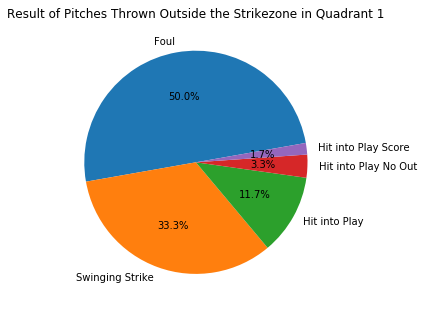

In [18]:
des = in_up4.description
des = des.values
des

n_ss = np.count_nonzero(des=='swinging_strike')
n_f = np.count_nonzero(des=='foul')
n_hip = np.count_nonzero(des=='hit_into_play')
n_hipno = np.count_nonzero(des=='hit_into_play_no_out')
n_hips = np.count_nonzero(des=='hit_into_play_score')
outcomes = pd.DataFrame([(n_f),(n_ss),(n_hip),(n_hipno),(n_hips)],
                        index=['Foul','Swinging Strike','Hit into Play','Hit into Play No Out','Hit into Play Score'],
                       columns=['Number'])

pie_labels = outcomes.index
outcomes['Number'].plot(kind='pie', labels = pie_labels, figsize=(5,6), autopct = '%1.1f%%', startangle=10)
plt.axes().set_ylabel('')
plt.title('Result of Pitches Thrown Outside the Strikezone in Quadrant 1')

### Now we can evaluate the trends seen in each of the main categories of swings.  I'll choose to not look at the foul tips, hit into play score, and hit into play no out categories since they are ~10% of the total at bats

In [19]:
in_up5 = in_up4.loc[in_up4['description'] == 'swinging_strike']
in_up6 = in_up4.loc[in_up4['description'] == 'foul']
in_up7 = in_up4.loc[in_up4['description'] == 'hit_into_play']

### Scatter plots show where the pitches in the first quandrant were for each outcome (foul ball, swinging strike, and hit into play

Text(0, 0.5, 'Y Coordinate')

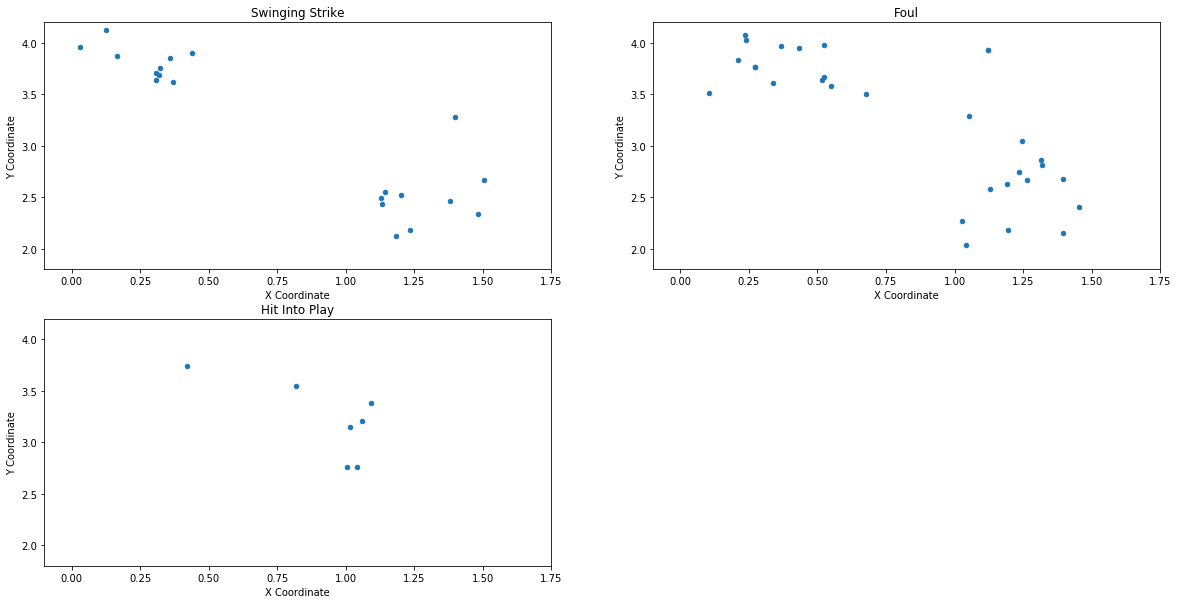

In [20]:
fig2 = plt.figure()

ax5 = fig2.add_subplot(2, 2, 1) # add subplot 1 (2 row, 2 columns, first plot)
ax6 = fig2.add_subplot(2, 2, 2)
ax7 = fig2.add_subplot(2, 2, 3)

in_up5.plot(kind='scatter', x='plate_x', y='plate_z', figsize=(20, 10), ax = ax5)
ax5.set_xlim([-0.1, 1.75])
ax5.set_ylim([1.8, 4.2])
ax5.set_title('Swinging Strike')
ax5.set_xlabel('X Coordinate')
ax5.set_ylabel('Y Coordinate')
in_up6.plot(kind='scatter', x='plate_x', y='plate_z', figsize=(20, 10), ax = ax6)
ax6.set_xlim([-0.1, 1.75])
ax6.set_ylim([1.8, 4.2])
ax6.set_title('Foul')
ax6.set_xlabel('X Coordinate')
ax6.set_ylabel('Y Coordinate')
in_up7.plot(kind='scatter', x='plate_x', y='plate_z', figsize=(20, 10), ax = ax7)
ax7.set_xlim([-0.1, 1.75])
ax7.set_ylim([1.8, 4.2])
ax7.set_title('Hit Into Play')
ax7.set_xlabel('X Coordinate')
ax7.set_ylabel('Y Coordinate')

### Analyzing the swinging strike plot first, we can analyze the proportion of each pitch Harper saw and swung at in this quandrant

In [21]:
in_up5.pitch_type.unique()

array(['FT', 'FF', 'FC', 'SL', 'CH'], dtype=object)

C:\Users\blync\anaconda3\lib\site-packages\ipykernel_launcher.py:16: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  app.launch_new_instance()


Text(0.5, 1.0, 'Types of Pitches Thrown for Swinging Strikes Outside the Strikezone in Quadrant 1')

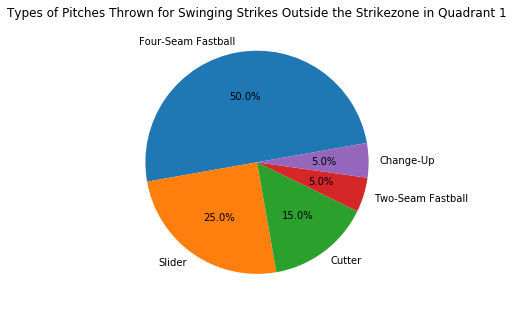

In [22]:
des2 = in_up5.pitch_type
des2 = des2.values

n2_ff = np.count_nonzero(des2=='FF')
n2_fc = np.count_nonzero(des2=='FC')
n2_sl = np.count_nonzero(des2=='SL')
n2_ft = np.count_nonzero(des2=='FT')
n2_ch = np.count_nonzero(des2=='CH')

outcomes2 = pd.DataFrame([(n2_ff),(n2_sl),(n2_fc),(n2_ft),(n2_ch)],
                        index=['Four-Seam Fastball','Slider','Cutter','Two-Seam Fastball','Change-Up'],
                       columns=['Number'])

pie_labels2 = outcomes2.index
outcomes2['Number'].plot(kind='pie', labels = pie_labels2, figsize=(5,6), autopct = '%1.1f%%', startangle=10)
plt.axes().set_ylabel('')
plt.title('Types of Pitches Thrown for Swinging Strikes Outside the Strikezone in Quadrant 1')

### The pie chart shows that Harper is mostly chasing four-seam fastballs.  We can analyze this further to see the speeds of these fastballs that he's chasing up in the zone

In [23]:
fsf = in_up5.loc[in_up5['pitch_type']=='FF']

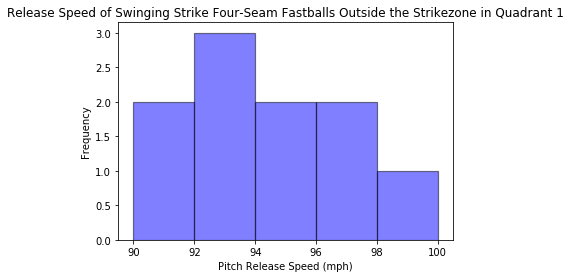

In [24]:
bin_edges = [90, 92, 94, 96, 98, 100]
n, bins, patches = plt.hist(fsf.release_speed, bin_edges, edgecolor = 'black', linewidth = 1.2, facecolor='blue', alpha=0.5)

plt.xlabel('Pitch Release Speed (mph)')
plt.ylabel('Frequency')
plt.title('Release Speed of Swinging Strike Four-Seam Fastballs Outside the Strikezone in Quadrant 1')
plt.show()

### The histogram shows the four-seam fastballs are mostly between 90-96 mph in this region of the zone

In [25]:
fsf.release_speed.describe()

count    10.000000
mean     94.390000
std       2.683054
min      90.600000
25%      92.475000
50%      94.200000
75%      96.075000
max      99.300000
Name: release_speed, dtype: float64

### Next, we can analyze at the foul balls that were hit in this quadrant

In [26]:
in_up6.pitch_type.unique()

array(['CH', 'FC', 'FF', 'FT', 'SI', 'CU', 'KC'], dtype=object)

C:\Users\blync\anaconda3\lib\site-packages\ipykernel_launcher.py:19: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


Text(0.5, 1.0, 'Types of Pitches Thrown that Resulted in Foul Balls Outside the Strikezone in Quadrant 1')

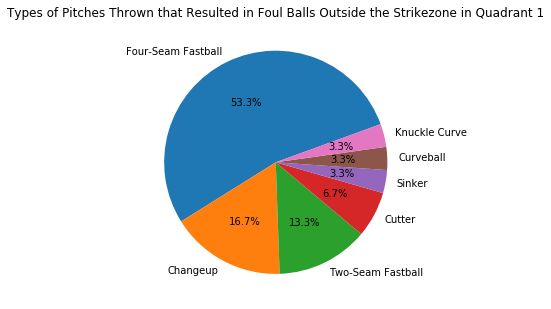

In [27]:
des3 = in_up6.pitch_type
des3 = des3.values
des3

n2_ff = np.count_nonzero(des3=='FF')
n2_fc = np.count_nonzero(des3=='FC')
n2_ft = np.count_nonzero(des3=='FT')
n2_ch = np.count_nonzero(des3=='CH')
n2_si = np.count_nonzero(des3=='SI')
n2_cu = np.count_nonzero(des3=='CU')
n2_kc = np.count_nonzero(des3=='KC')

outcomes2 = pd.DataFrame([(n2_ff),(n2_ch),(n2_ft),(n2_fc), (n2_si), (n2_cu), (n2_kc)],
                        index=['Four-Seam Fastball','Change-Up','Two-Seam Fastball','Cutter','Sinker','Curveball','Knuckle Curve'],
                       columns=['Number'])

pie_labels3 = ['Four-Seam Fastball','Changeup','Two-Seam Fastball','Cutter','Sinker','Curveball','Knuckle Curve']
outcomes2['Number'].plot(kind='pie', labels = pie_labels3, figsize=(5,6), autopct = '%1.1f%%', startangle=20)
plt.axes().set_ylabel('')
plt.title('Types of Pitches Thrown that Resulted in Foul Balls Outside the Strikezone in Quadrant 1')

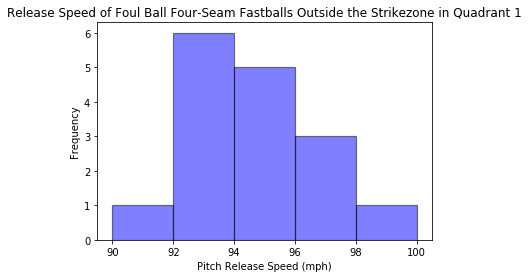

In [28]:
fsf6 = in_up6.loc[in_up6['pitch_type']=='FF']
bin_edges = [90, 92, 94, 96, 98, 100]
n, bins, patches = plt.hist(fsf6.release_speed, bin_edges, edgecolor = 'black', linewidth = 1.2, facecolor='blue', alpha=0.5)
plt.xlabel('Pitch Release Speed (mph)')
plt.ylabel('Frequency')
plt.title('Release Speed of Foul Ball Four-Seam Fastballs Outside the Strikezone in Quadrant 1')
plt.show()

In [29]:
fsf6.release_speed.describe()

count    16.000000
mean     94.562500
std       2.025792
min      91.600000
25%      92.950000
50%      94.650000
75%      95.900000
max      98.000000
Name: release_speed, dtype: float64

### The foul balls were also mostly four-seam fastballs ranging from 92-96 mph.

### Lastly, we'll look at the balls hit into play in this quadrant

In [30]:
in_up7.pitch_type.unique()

array(['FF', 'SI', 'FC'], dtype=object)

C:\Users\blync\anaconda3\lib\site-packages\ipykernel_launcher.py:16: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  app.launch_new_instance()


Text(0.5, 1.0, 'Types of Pitches Thrown that Resulted in Balls Hit into Play Outside the Strikezone in Quadrant 1')

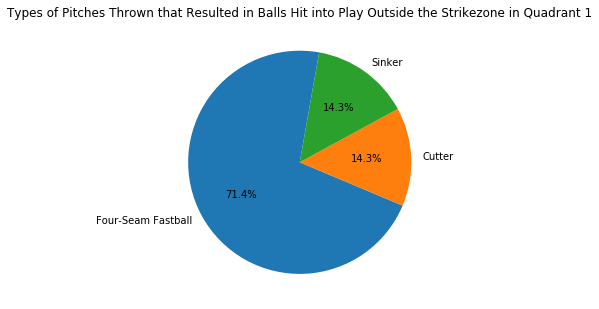

In [31]:
des4 = in_up7.pitch_type
des4 = des4.values
des4

n3_ff = np.count_nonzero(des4=='FF')
n3_si = np.count_nonzero(des4=='SI')
n3_fc = np.count_nonzero(des4=='FC')


outcomes3 = pd.DataFrame([(n3_ff),(n3_fc),(n3_si)],
                        index=['Four-Seam Fastball','Cutter','Sinker'],
                       columns=['Number'])

pie_labels4 = ['Four-Seam Fastball','Cutter','Sinker']
outcomes3['Number'].plot(kind='pie', labels = pie_labels4, figsize=(5,6), autopct = '%1.1f%%', startangle=80)
plt.axes().set_ylabel('')
plt.title('Types of Pitches Thrown that Resulted in Balls Hit into Play Outside the Strikezone in Quadrant 1')

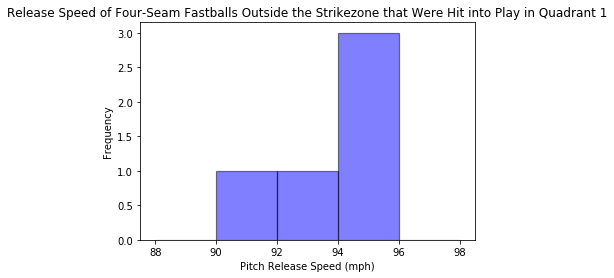

In [32]:
fsf7 = in_up7.loc[in_up7['pitch_type']=='FF']
bin_edges = [88, 90, 92, 94, 96, 98]
n, bins, patches = plt.hist(fsf7.release_speed, bin_edges, edgecolor = 'black', linewidth = 1.2, facecolor='blue', alpha=0.5)
plt.xlabel('Pitch Release Speed (mph)')
plt.ylabel('Frequency')
plt.title('Release Speed of Four-Seam Fastballs Outside the Strikezone that Were Hit into Play in Quadrant 1')
plt.show()

### Again, the four seam fastball was the pitch pitchers threw ~70% of the time in this quadrant when Harper hit the balls into play

### This begs the question of when a four-seam fastball was thrown in this quadrant, what was the outcome?

In [33]:
in_up8 = in_up4.loc[in_up4['pitch_type'] == 'FF']
in_up9 = in_up8[['description', 'release_speed']]

In [34]:
in_up9.description.unique()

array(['swinging_strike', 'hit_into_play', 'foul', 'hit_into_play_score',
       'hit_into_play_no_out'], dtype=object)

C:\Users\blync\anaconda3\lib\site-packages\ipykernel_launcher.py:16: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  app.launch_new_instance()


Text(0.5, 1.0, 'Result of Four-Seam Fastball Thrown Outside the Strikezone in Quadrant 1')

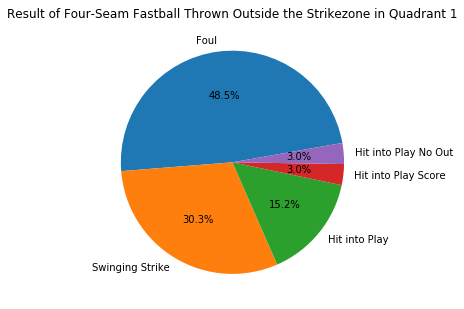

In [35]:
des5 = in_up9.description
des5 = des5.values

n4_ss = np.count_nonzero(des5=='swinging_strike')
n4_hip = np.count_nonzero(des5=='hit_into_play')
n4_f = np.count_nonzero(des5=='foul')
n4_hips = np.count_nonzero(des5=='hit_into_play_score')
n4_hipno = np.count_nonzero(des5 == 'hit_into_play_no_out')

outcomes4 = pd.DataFrame([(n4_f),(n4_ss),(n4_hip),(n4_hips), (n4_hipno)],
                        index=['Foul','Swinging Strike','Hit into Play','Hit into Play Score', 'Hit into Play No Out'],
                       columns=['Number'])

pie_labels5 = ['Foul','Swinging Strike','Hit into Play','Hit into Play Score', 'Hit into Play No Out']
outcomes4['Number'].plot(kind='pie', labels = pie_labels5, figsize=(5,6), autopct = '%1.1f%%', startangle=10)
plt.axes().set_ylabel('')
plt.title('Result of Four-Seam Fastball Thrown Outside the Strikezone in Quadrant 1')

### 78.8% of last year's pitches in this area were either fouled off or swinging strikes to Harper.  He was only able to hit 6.0% of them in play for a hit

### Of course, these pitches are also dependent on the situation.  The next analysis looks at the pitches that were thrown in this quadrant with 2 strikes and less than 2 strikes.

In [36]:
in_up10 = in_up4.loc[in_up4['strikes'] == 2]
in_up11 = in_up4.loc[in_up4['strikes'] < 2]

Text(0, 0.5, 'Y Coordinate')

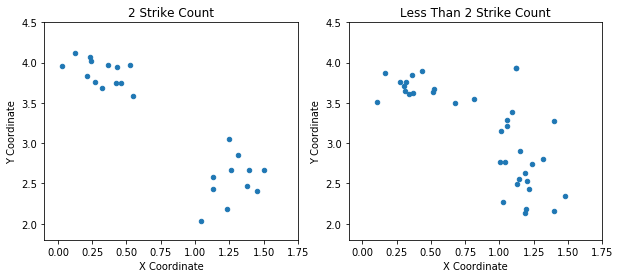

In [37]:
fig3 = plt.figure()

ax8 = fig3.add_subplot(1, 2, 1) # add subplot 1 (1 row, 2 columns, first plot)
ax9 = fig3.add_subplot(1, 2, 2)


in_up10.plot(kind='scatter', x='plate_x', y='plate_z', figsize=(10, 4), ax = ax8)
ax8.set_xlim([-.1, 1.75])
ax8.set_ylim([1.8, 4.5])
ax8.set_title('2 Strike Count')
ax8.set_xlabel('X Coordinate')
ax8.set_ylabel('Y Coordinate')
in_up11.plot(kind='scatter', x='plate_x', y='plate_z', figsize=(10, 4), ax = ax9)
ax9.set_xlim([-.1, 1.75])
ax9.set_ylim([1.8, 4.5])
ax9.set_title('Less Than 2 Strike Count')
ax9.set_xlabel('X Coordinate')
ax9.set_ylabel('Y Coordinate')

In [38]:
in_up10.description.unique()

array(['swinging_strike', 'foul', 'hit_into_play', 'hit_into_play_no_out'],
      dtype=object)

C:\Users\blync\anaconda3\lib\site-packages\ipykernel_launcher.py:15: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  from ipykernel import kernelapp as app


Text(0.5, 1.0, 'Result of Four Seam Fastballs Thrown Outside the Strikezone in Quadrant 1 with 2 Strikes')

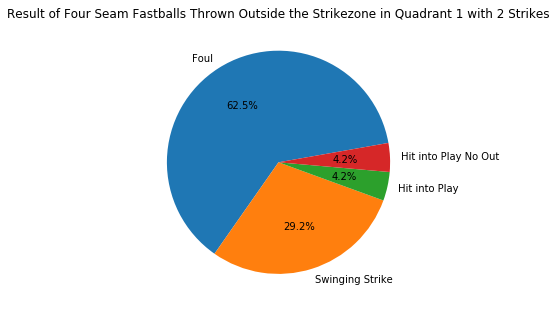

In [39]:
des6 = in_up10.description
des6 = des6.values

n5_ss = np.count_nonzero(des6=='swinging_strike')
n5_hip = np.count_nonzero(des6=='hit_into_play')
n5_f = np.count_nonzero(des6=='foul')
n5_hipno = np.count_nonzero(des6 == 'hit_into_play_no_out')

outcomes5 = pd.DataFrame([(n5_f), (n5_ss),(n5_hip),(n5_hipno)],
                        index=['Foul', 'Swinging Strike','Hit into Play','Hit into Play No Out'],
                       columns=['Number'])

pie_labels6 = ['Foul','Swinging Strike','Hit into Play', 'Hit into Play No Out']
outcomes5['Number'].plot(kind='pie', labels = pie_labels6, figsize=(5,6), autopct = '%1.1f%%', startangle=10)
plt.axes().set_ylabel('')
plt.title('Result of Four Seam Fastballs Thrown Outside the Strikezone in Quadrant 1 with 2 Strikes')

### With 2 strikes, ~90% of the time, Harper will foul off pitches or swing through the pitch.  He only connects and gets a hit 4.2% of the times

### We can analyze each of the 3 most popular outcomes with the pitches associated with the outcome

In [40]:
in_up11 = in_up10.loc[in_up10['description'] == 'swinging_strike']
in_up12 = in_up10.loc[in_up10['description'] == 'foul']
in_up13 = in_up10.loc[in_up10['description'] == 'hit_into_play']

In [41]:
in_up11.pitch_type.unique()

array(['FC', 'SL', 'FF'], dtype=object)

C:\Users\blync\anaconda3\lib\site-packages\ipykernel_launcher.py:14: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  


Text(0.5, 1.0, 'Types of Pitches Thrown in a 2 Strike Count that Resulted in Swinging Strikes Outside the Strikezone in Quadrant 1')

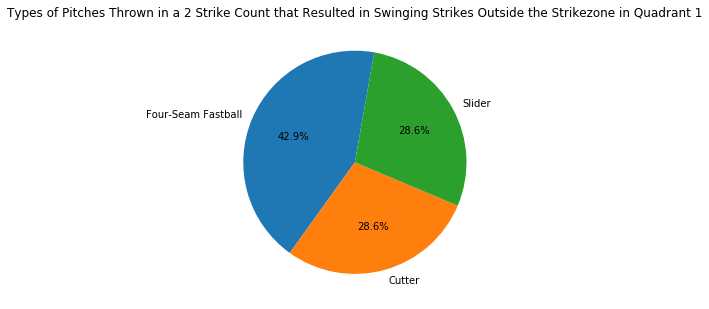

In [42]:
des11 = in_up11.pitch_type
des11 = des11.values

n11_ff = np.count_nonzero(des11=='FF')
n11_fc = np.count_nonzero(des11=='FC')
n11_sl = np.count_nonzero(des11=='SL')

outcomes11 = pd.DataFrame([(n11_ff),(n11_fc),(n11_sl)],
                        index=['Four-Seam Fastball','Cutter','Slider'],
                       columns=['Number'])

pie_labels11 = ['Four-Seam Fastball','Cutter','Slider']
outcomes11['Number'].plot(kind='pie', labels = pie_labels11, figsize=(5,6), autopct = '%1.1f%%', startangle=80)
plt.axes().set_ylabel('')
plt.title('Types of Pitches Thrown in a 2 Strike Count that Resulted in Swinging Strikes Outside the Strikezone in Quadrant 1')

### With 2 strikes, pitchers got a swinging strike from Harper by throwing a four-seam fastball 43% of the time in this quadrant of the zone

In [43]:
in_up12.pitch_type.unique()

array(['FT', 'FC', 'CH', 'FF', 'KC'], dtype=object)

C:\Users\blync\anaconda3\lib\site-packages\ipykernel_launcher.py:16: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  app.launch_new_instance()


Text(0.5, 1.0, 'Types of Pitches Thrown in a 2 Strike Count that Resulted in a Foul Ball Outside the Strikezone in Quadrant 1')

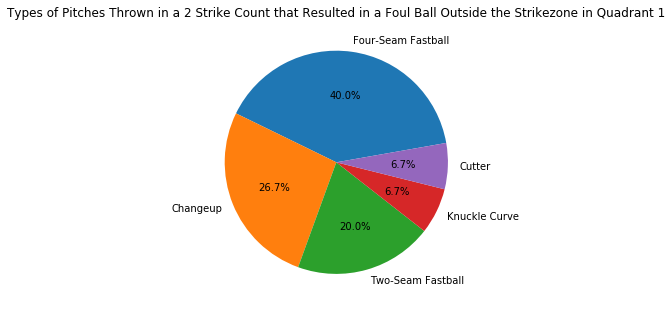

In [44]:
des12 = in_up12.pitch_type
des12 = des12.values

n12_ff = np.count_nonzero(des12=='FF')
n12_fc = np.count_nonzero(des12=='FC')
n12_ft = np.count_nonzero(des12=='FT')
n12_ch = np.count_nonzero(des12=='CH')
n12_kc = np.count_nonzero(des12=='KC')

outcomes12 = pd.DataFrame([(n12_ff),(n12_ch),(n12_ft),(n12_kc),(n12_fc)],
                        index=['Four-Seam Fastball','Changeup','Two-Seam Fastball','Knuckle Curve','Cutter'],
                       columns=['Number'])

pie_labels12 = ['Four-Seam Fastball','Changeup','Two-Seam Fastball','Knuckle Curve','Cutter']
outcomes12['Number'].plot(kind='pie', labels = pie_labels12, figsize=(5,6), autopct = '%1.1f%%', startangle=10)
plt.axes().set_ylabel('')
plt.title('Types of Pitches Thrown in a 2 Strike Count that Resulted in a Foul Ball Outside the Strikezone in Quadrant 1')

### With 2 strikes, Harper foul balls consisted of mostly 2- and 4-seam fastballs (~60%)

In [45]:
in_up13.pitch_type.unique()

array(['FF'], dtype=object)

C:\Users\blync\anaconda3\lib\site-packages\ipykernel_launcher.py:13: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  del sys.path[0]


Text(0.5, 1.0, 'Types of Pitches Thrown in a 2 Strike Count that Resulted in a Ball Hit into Play Outside the Strikezone in Quadrant 1')

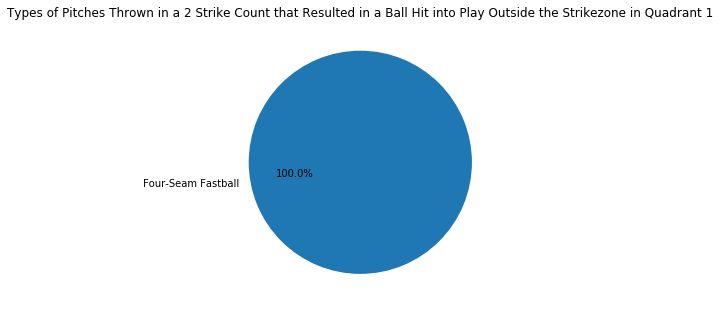

In [46]:
des13 = in_up13.pitch_type
des13 = des13.values

n13_ff = np.count_nonzero(des13=='FF')


outcomes13 = pd.DataFrame([(n13_ff)],
                        index=['Four-Seam Fastball'],
                       columns=['Number'])

pie_labels13 = ['Four-Seam Fastball','Sinker']
outcomes13['Number'].plot(kind='pie', labels = pie_labels13, figsize=(5,6), autopct = '%1.1f%%', startangle=10)
plt.axes().set_ylabel('')
plt.title('Types of Pitches Thrown in a 2 Strike Count that Resulted in a Ball Hit into Play Outside the Strikezone in Quadrant 1')

### If Harper put a ball into play with 2 strikes, 100% of those pitches were four-seam fastballs

### Now, we can do a similar analysis of the second quadrant

### We can analyze what happened when these pitches were thrown

In [47]:
out_up4.description.unique()

array(['foul', 'swinging_strike', 'hit_into_play', 'foul_tip',
       'hit_into_play_no_out', 'hit_into_play_score'], dtype=object)

C:\Users\blync\anaconda3\lib\site-packages\ipykernel_launcher.py:16: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  app.launch_new_instance()


Text(0.5, 1.0, 'Result of Pitches Thrown outside the Strikezone in Quadrant 2')

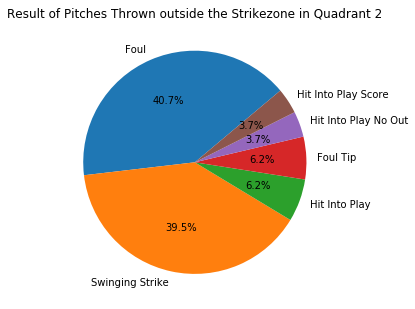

In [48]:
des21 = out_up4.description
des21 = des21.values

n21_ss = np.count_nonzero(des21=='swinging_strike')
n21_f = np.count_nonzero(des21=='foul')
n21_hip = np.count_nonzero(des21=='hit_into_play')
n21_hipno = np.count_nonzero(des21=='hit_into_play_no_out')
n21_hips = np.count_nonzero(des21=='hit_into_play_score')
n21_ft = np.count_nonzero(des21=='foul_tip')
outcomes21 = pd.DataFrame([(n21_f),(n21_ss),(n21_hip),(n21_ft),(n21_hipno),(n21_hips)],
                        index=['foul','swinging_strike','hit_into_play','foul_tip','hit_into_play_no_out','hit_into_play_score'],
                       columns=['Number'])

pie_labels21 = ['Foul','Swinging Strike', 'Hit Into Play','Foul Tip', 'Hit Into Play No Out', 'Hit Into Play Score']
outcomes21['Number'].plot(kind='pie', labels = pie_labels21, figsize=(5,6), autopct = '%1.1f%%', startangle=40)
plt.axes().set_ylabel('')
plt.title('Result of Pitches Thrown outside the Strikezone in Quadrant 2')

### Swinging strikes, foul balls, and balls hit into play were the most popular outcome from pitches thrown in this second quadrant

In [49]:
out_up5 = out_up4.loc[out_up4['description'] == 'swinging_strike']
out_up6 = out_up4.loc[out_up4['description'] == 'foul']
out_up7 = out_up4.loc[out_up4['description'] == 'hit_into_play']

### Each outcome was divided into its own seperate plot

Text(0, 0.5, 'Y Coordinate')

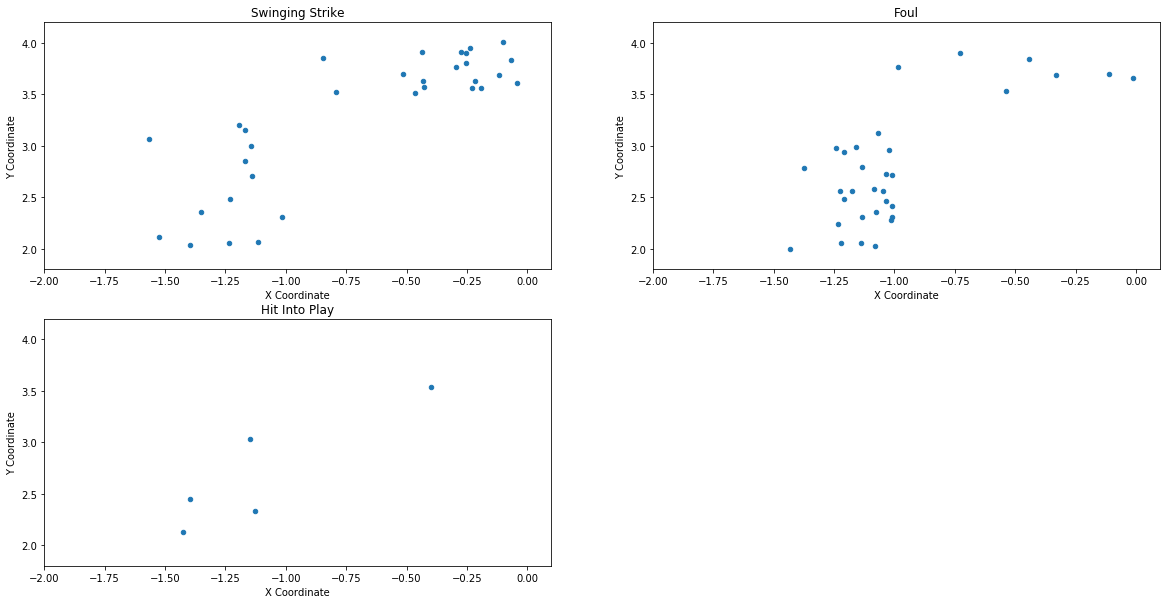

In [50]:
fig4 = plt.figure()

ax10 = fig4.add_subplot(2, 2, 1) # add subplot 1 (2 row, 2 columns, first plot)
ax11 = fig4.add_subplot(2, 2, 2)
ax12 = fig4.add_subplot(2, 2, 3)

out_up5.plot(kind='scatter', x='plate_x', y='plate_z', figsize=(20, 10), ax = ax10)
ax10.set_xlim([-2, 0.1])
ax10.set_ylim([1.8, 4.2])
ax10.set_title('Swinging Strike')
ax10.set_xlabel('X Coordinate')
ax10.set_ylabel('Y Coordinate')
out_up6.plot(kind='scatter', x='plate_x', y='plate_z', figsize=(20, 10), ax = ax11)
ax11.set_xlim([-2, 0.1])
ax11.set_ylim([1.8, 4.2])
ax11.set_title('Foul')
ax11.set_xlabel('X Coordinate')
ax11.set_ylabel('Y Coordinate')
out_up7.plot(kind='scatter', x='plate_x', y='plate_z', figsize=(20, 10), ax = ax12)
ax12.set_xlim([-2, 0.1])
ax12.set_ylim([1.8, 4.2])
ax12.set_title('Hit Into Play')
ax12.set_xlabel('X Coordinate')
ax12.set_ylabel('Y Coordinate')

### We can analyze the pitches thrown to Harper that resulted in swinging strikes in quadrant 2

In [51]:
out_up5.pitch_type.unique()

array(['CU', 'SL', 'CH', 'FF', 'FT', 'SI'], dtype=object)

C:\Users\blync\anaconda3\lib\site-packages\ipykernel_launcher.py:17: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


Text(0.5, 1.0, 'Types of Pitches Thrown that Resulted in Swinging Strikes Outside the Strikezone in Quadrant 2')

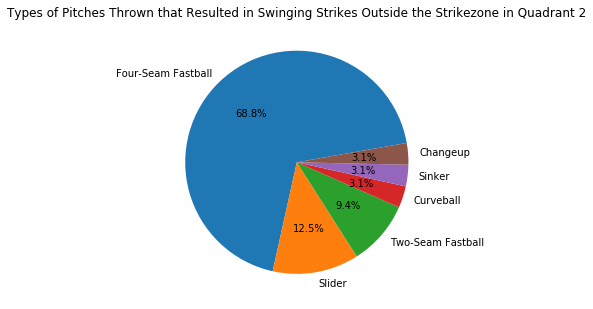

In [52]:
des22 = out_up5.pitch_type
des22 = des22.values

n22_ff = np.count_nonzero(des22=='FF')
n22_sl = np.count_nonzero(des22=='SL')
n22_cu = np.count_nonzero(des22=='CU')
n22_ch = np.count_nonzero(des22=='CH')
n22_ft = np.count_nonzero(des22=='FT')
n22_si = np.count_nonzero(des22=='SI')

outcomes22 = pd.DataFrame([(n22_ff),(n22_sl),(n22_ft),(n22_cu),(n22_si),(n22_ch)],
                        index=['Four-Seam Fastball','Slider','Two-Seam Fastball','Curveball','Sinker','Changeup'],
                       columns=['Number'])

pie_labels22 = outcomes22.index
outcomes22['Number'].plot(kind='pie', labels = pie_labels22, figsize=(5,6), autopct = '%1.1f%%', startangle=10, counterclock=True)
plt.axes().set_ylabel('')
plt.title('Types of Pitches Thrown that Resulted in Swinging Strikes Outside the Strikezone in Quadrant 2')

### ~62% of the pitches that were resulted in swinging strikes in this quadrant were four-seam fastballs

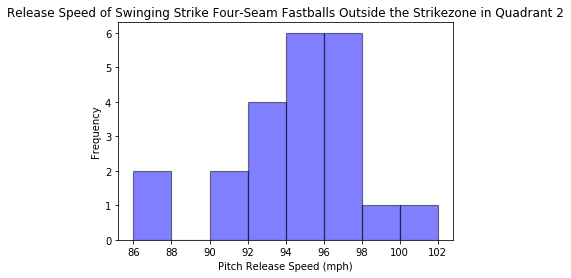

In [53]:
fsf8 = out_up5.loc[out_up5['pitch_type']=='FF']
bin_edges = [86,88, 90, 92, 94, 96, 98, 100,102]
n, bins, patches = plt.hist(fsf8.release_speed, bin_edges, edgecolor = 'black', linewidth = 1.2, facecolor='blue', alpha=0.5)
plt.xlabel('Pitch Release Speed (mph)')
plt.ylabel('Frequency')
plt.title('Release Speed of Swinging Strike Four-Seam Fastballs Outside the Strikezone in Quadrant 2')
plt.show()

### These four-seam fastballs were mostly thrown betwen 92-98 mph

In [54]:
fsf8.release_speed.describe()

count     22.000000
mean      94.445455
std        3.328052
min       87.000000
25%       92.500000
50%       94.950000
75%       96.375000
max      100.500000
Name: release_speed, dtype: float64

### The type of pitch thrown that was fouled off in the second quadrant can also be analyzed

In [55]:
out_up6.pitch_type.unique()

array(['CH', 'CU', 'FF', 'FT', 'FC', 'SL', 'SI'], dtype=object)

C:\Users\blync\anaconda3\lib\site-packages\ipykernel_launcher.py:18: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


Text(0.5, 1.0, 'Types of Pitches Thrown that Resulted in a Foul Outside the Strikezone in Quadrant 2')

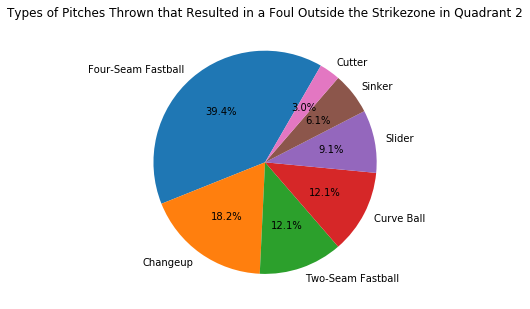

In [56]:
des23 = out_up6.pitch_type
des23 = des23.values

n23_ff = np.count_nonzero(des23=='FF')
n23_fc = np.count_nonzero(des23=='FC')
n23_sl = np.count_nonzero(des23=='SL')
n23_cu = np.count_nonzero(des23=='CU')
n23_ch = np.count_nonzero(des23=='CH')
n23_ft = np.count_nonzero(des23=='FT')
n23_si = np.count_nonzero(des23=='SI')

outcomes23 = pd.DataFrame([(n23_ff),(n23_ch),(n23_ft),(n23_cu),(n23_sl),(n23_si),(n23_fc)],
                        index=['Four-Seam Fastball','Changeup','Two-Seam Fastball','Curve Ball','Slider','Sinker','Cutter'],
                       columns=['Number'])

pie_labels23 = ['Four-Seam Fastball','Changeup','Two-Seam Fastball','Curve Ball','Slider','Sinker','Cutter']
outcomes23['Number'].plot(kind='pie', labels = pie_labels23, figsize=(5,6), autopct = '%1.1f%%', startangle=60)
plt.axes().set_ylabel('')
plt.title('Types of Pitches Thrown that Resulted in a Foul Outside the Strikezone in Quadrant 2')

### Four-seam fastballs constitute ~40% of the total pitches thrown for foul balls in this quadrant.  We can analyze the speed at which these pitches are thrown

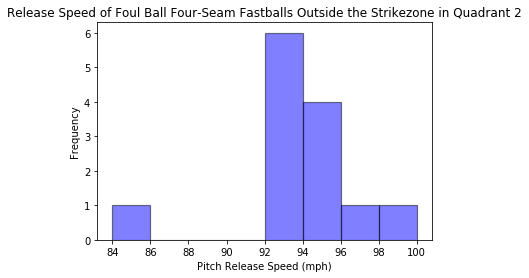

In [86]:
fsf9 = out_up6.loc[out_up6['pitch_type']=='FF']
bin_edges = [84, 86, 88, 90, 92, 94, 96, 98, 100]
n, bins, patches = plt.hist(fsf9.release_speed, bin_edges, edgecolor = 'black', linewidth = 1.2, facecolor='blue', alpha=0.5)
plt.xlabel('Pitch Release Speed (mph)')
plt.ylabel('Frequency')
plt.title('Release Speed of Foul Ball Four-Seam Fastballs Outside the Strikezone in Quadrant 2')
plt.show()

### Most of these four-seam fastballs were thrown between 92-96 mph

In [58]:
fsf9.release_speed.describe()

count    13.000000
mean     93.607692
std       3.039863
min      85.800000
25%      92.900000
50%      93.600000
75%      94.500000
max      98.900000
Name: release_speed, dtype: float64

### Next, we can look at the typs of pitches Harper puts into play in this zone

In [59]:
out_up7.pitch_type.unique()

array(['CU', 'CH', 'FT'], dtype=object)

C:\Users\blync\anaconda3\lib\site-packages\ipykernel_launcher.py:15: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  from ipykernel import kernelapp as app


Text(0.5, 1.0, 'Types of Pitches Thrown that Resulted in Balls Hit into Play Outside the Strikezone in Quadrant 2')

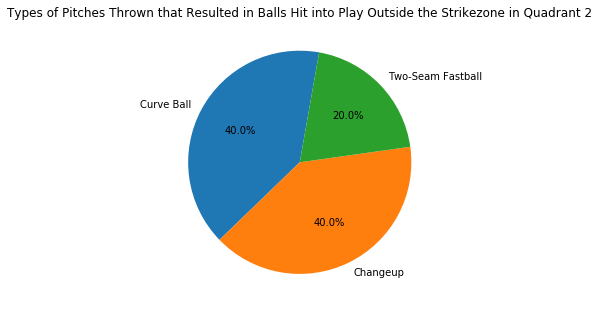

In [60]:
des24 = out_up7.pitch_type
des24 = des24.values


n24_cu = np.count_nonzero(des24=='CU')
n24_ch = np.count_nonzero(des24=='CH')
n24_ft = np.count_nonzero(des24=='FT')

outcomes24 = pd.DataFrame([(n24_cu),(n24_ch),(n24_ft)],
                        index=['Curve Ball','Changeup','Two-Seam Fastball'],
                       columns=['Number'])

pie_labels24 = ['Curve Ball','Changeup','Two-Seam Fastball']
outcomes24['Number'].plot(kind='pie', labels = pie_labels24, figsize=(5,6), autopct = '%1.1f%%', startangle=80)
plt.axes().set_ylabel('')
plt.title('Types of Pitches Thrown that Resulted in Balls Hit into Play Outside the Strikezone in Quadrant 2')

### This pie chart shows the variety of pithces that Harper hit into play in 2019

### After doing these two analyses, I wanted to see if there were any trends with the pitches that were located above the zone 

In [61]:
above_zone.description.unique()

array(['swinging_strike', 'foul', 'hit_into_play', 'hit_into_play_score',
       'hit_into_play_no_out', 'foul_tip'], dtype=object)

C:\Users\blync\anaconda3\lib\site-packages\ipykernel_launcher.py:16: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  app.launch_new_instance()


Text(0.5, 1.0, 'Result of Pitches Thrown above the Strikezone')

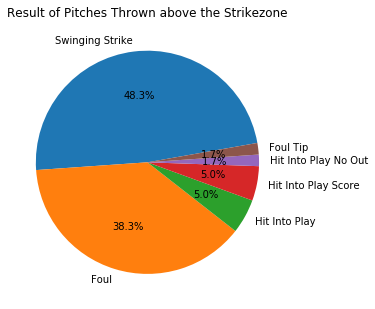

In [62]:
des25 = above_zone.description
des25 = des25.values

n25_ss = np.count_nonzero(des25=='swinging_strike')
n25_f = np.count_nonzero(des25=='foul')
n25_hip = np.count_nonzero(des25=='hit_into_play')
n25_hipno = np.count_nonzero(des25=='hit_into_play_no_out')
n25_hips = np.count_nonzero(des25=='hit_into_play_score')
n25_ft = np.count_nonzero(des25=='foul_tip')
outcomes25 = pd.DataFrame([(n25_ss),(n25_f),(n25_hip),(n25_hips),(n25_hipno),(n25_ft)],
                        index=['swinging_strike','foul','hit_into_play','hit_into_play_score','hit_into_play_no_out','foul tip'],
                       columns=['Number'])

pie_labels25 = ['Swinging Strike', 'Foul', 'Hit Into Play','Hit Into Play Score', 'Hit Into Play No Out', 'Foul Tip']
outcomes25['Number'].plot(kind='pie', labels = pie_labels25, figsize=(5,6), autopct = '%1.1f%%', startangle=10)
plt.axes().set_ylabel('')
plt.title('Result of Pitches Thrown above the Strikezone')

### ~75% of the pitches that were thrown above the strikezone were either fouled off or were swinging strikes

In [63]:
above_zone.pitch_type.unique()

array(['FF', 'SL', 'FT', 'CH', 'KC', 'SI'], dtype=object)

C:\Users\blync\anaconda3\lib\site-packages\ipykernel_launcher.py:17: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


Text(0.5, 1.0, 'Types of Pitches Thrown above the Strikezone')

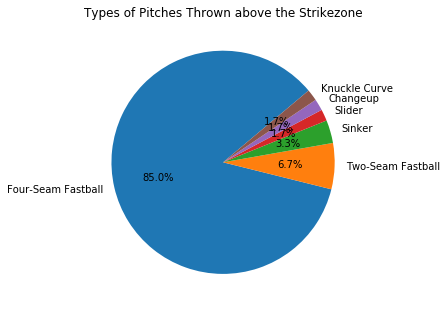

In [64]:
des26 = above_zone.pitch_type
des26 = des26.values

n26_sl = np.count_nonzero(des26=='SL')
n26_ff = np.count_nonzero(des26=='FF')
n26_ft = np.count_nonzero(des26=='FT')
n26_si = np.count_nonzero(des26=='SI')
n26_ch = np.count_nonzero(des26=='CH')
n26_kc = np.count_nonzero(des26=='KC')

outcomes26 = pd.DataFrame([(n26_ff),(n26_ft),(n26_si),(n26_sl),(n26_ch),(n26_kc)],
                        index=['Four-Seam Fastball','Two-Seam Fastball','Sinker','Slider','Changeup','Knuckle Curve'],
                       columns=['Number'])

pie_labels26 = ['Four-Seam Fastball','Two-Seam Fastball','Sinker','Slider','Changeup','Knuckle Curve']
outcomes26['Number'].plot(kind='pie', labels = pie_labels26, figsize=(5,6), autopct = '%1.1f%%', startangle=40)
plt.axes().set_ylabel('')
plt.title('Types of Pitches Thrown above the Strikezone')

### 85% of the pitches that were thrown above the zone were four-seam fastballs

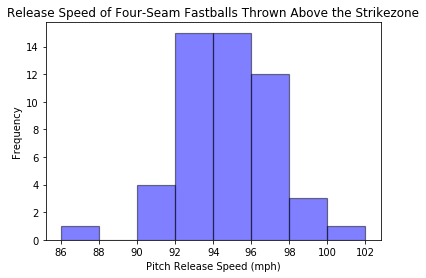

In [65]:
fsf10 = above_zone.loc[above_zone['pitch_type']=='FF']
bin_edges = [86,88, 90, 92, 94, 96, 98, 100,102]
n, bins, patches = plt.hist(fsf10.release_speed, bin_edges, edgecolor = 'black', linewidth = 1.2, facecolor='blue', alpha=0.5)
plt.xlabel('Pitch Release Speed (mph)')
plt.ylabel('Frequency')
plt.title('Release Speed of Four-Seam Fastballs Thrown Above the Strikezone')
plt.show()

### The four-seam fastballs were mostly between 92-96 mph

In [66]:
fsf10.release_speed.describe()

count     51.000000
mean      94.658824
std        2.505528
min       87.900000
25%       92.700000
50%       94.500000
75%       96.650000
max      100.500000
Name: release_speed, dtype: float64

### Next, we can analyze the pitches thrown in the quadrant 3 

In [67]:
out_down4.description.unique()

array(['swinging_strike', 'hit_into_play', 'swinging_strike_blocked',
       'foul', 'hit_into_play_no_out', 'hit_into_play_score', 'foul_tip'],
      dtype=object)

C:\Users\blync\anaconda3\lib\site-packages\ipykernel_launcher.py:18: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


Text(0.5, 1.0, 'Result of Pitches Thrown outside the Strikezone in Quadrant 3')

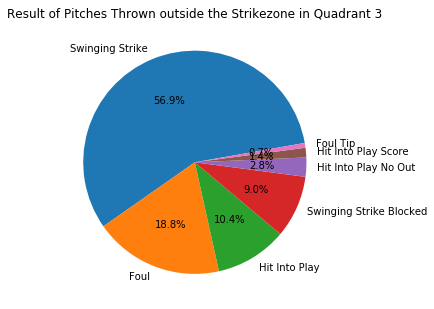

In [68]:
des31 = out_down4.description
des31 = des31.values

n31_ss = np.count_nonzero(des31=='swinging_strike')
n31_f = np.count_nonzero(des31=='foul')
n31_hip = np.count_nonzero(des31=='hit_into_play')
n31_hipno = np.count_nonzero(des31=='hit_into_play_no_out')
n31_ssb = np.count_nonzero(des31=='swinging_strike_blocked')
n31_hips = np.count_nonzero(des31=='hit_into_play_score')
n31_ft = np.count_nonzero(des31=='foul_tip')

outcomes31 = pd.DataFrame([(n31_ss),(n31_f),(n31_hip),(n31_ssb),(n31_hipno),(n31_hips),(n31_ft)],
                        index=['swinging_strike','foul','hit_into_play','swinging_strike_blocked','hit_into_play_no_out','hit_into_play_score','foul_tip'],
                       columns=['Number'])

pie_labels31 = ['Swinging Strike','Foul','Hit Into Play','Swinging Strike Blocked','Hit Into Play No Out','Hit Into Play Score','Foul Tip']
outcomes31['Number'].plot(kind='pie', labels = pie_labels31, figsize=(5,6), autopct = '%1.1f%%', startangle=10)
plt.axes().set_ylabel('')
plt.title('Result of Pitches Thrown outside the Strikezone in Quadrant 3')

### We see that most pitches Harper reached for in quadrant 3 were swinging strikes (~57%)

In [69]:
out_down5 = out_down4.loc[out_down4['description'] == 'swinging_strike']
out_down6 = out_down4.loc[out_down4['description'] == 'foul']
out_down7 = out_down4.loc[out_down4['description'] == 'hit_into_play']

### Again, we can analyze the 3 most popular outcomes

Text(0, 0.5, 'Y Coordinate')

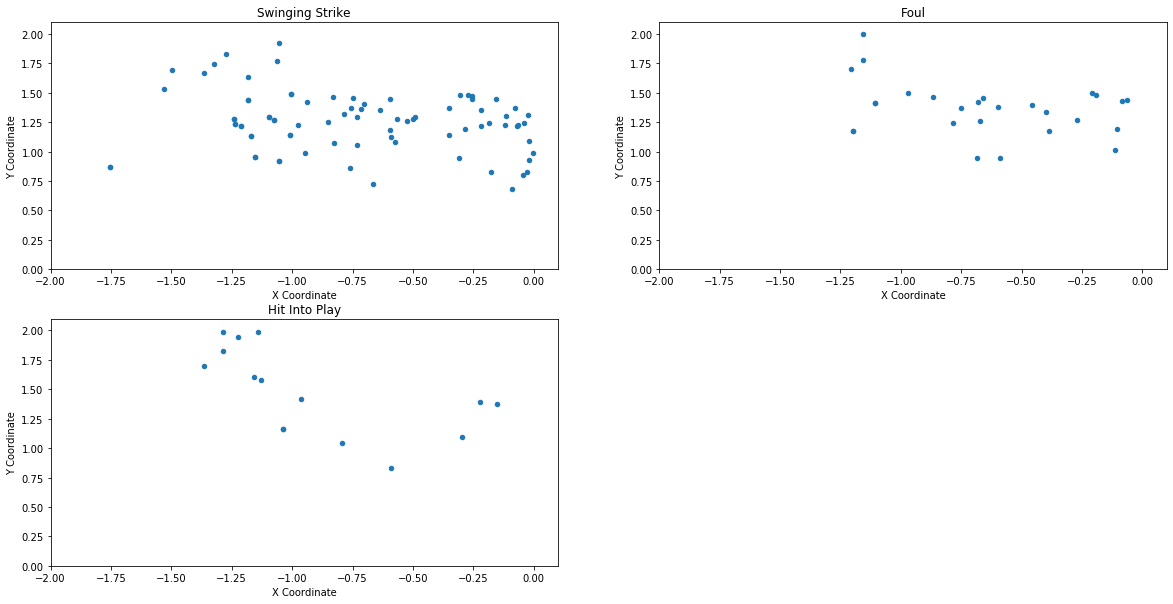

In [70]:
fig5 = plt.figure()

ax31 = fig5.add_subplot(2, 2, 1) # add subplot 1 (2 row, 2 columns, first plot)
ax32 = fig5.add_subplot(2, 2, 2)
ax33 = fig5.add_subplot(2, 2, 3)

out_down5.plot(kind='scatter', x='plate_x', y='plate_z', figsize=(20, 10), ax = ax31)
ax31.set_xlim([-2, 0.1])
ax31.set_ylim([0, 2.1])
ax31.set_title('Swinging Strike')
ax31.set_xlabel('X Coordinate')
ax31.set_ylabel('Y Coordinate')
out_down6.plot(kind='scatter', x='plate_x', y='plate_z', figsize=(20, 10), ax = ax32)
ax32.set_xlim([-2, 0.1])
ax32.set_ylim([0, 2.1])
ax32.set_title('Foul')
ax32.set_xlabel('X Coordinate')
ax32.set_ylabel('Y Coordinate')
out_down7.plot(kind='scatter', x='plate_x', y='plate_z', figsize=(20, 10), ax = ax33)
ax33.set_xlim([-2, 0.1])
ax33.set_ylim([0, 2.1])
ax33.set_title('Hit Into Play')
ax33.set_xlabel('X Coordinate')
ax33.set_ylabel('Y Coordinate')

In [71]:
out_down5.pitch_type.unique()

array(['CU', 'SL', 'CH', 'FF', 'FT', 'FS', 'SI'], dtype=object)

C:\Users\blync\anaconda3\lib\site-packages\ipykernel_launcher.py:18: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


Text(0.5, 1.0, 'Types of Pitches Thrown that Resulted in Swinging Strikes Outside the Strikezone in Quadrant 3')

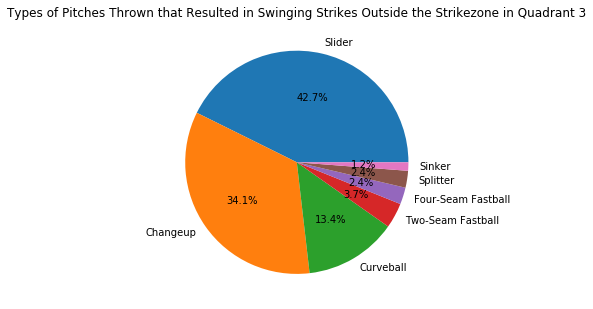

In [72]:
des32 = out_down5.pitch_type
des32 = des32.values

n32_sl = np.count_nonzero(des32=='SL')
n32_ff = np.count_nonzero(des32=='FF')
n32_ft = np.count_nonzero(des32=='FT')
n32_cu = np.count_nonzero(des32=='CU')
n32_ch = np.count_nonzero(des32=='CH')
n32_fs = np.count_nonzero(des32=='FS')
n32_si = np.count_nonzero(des32=='SI')

outcomes32 = pd.DataFrame([(n32_sl),(n32_ch),(n32_cu),(n32_ft),(n32_ff),(n32_fs),(n32_si)],
                        index=['Slider','Changeup','Curveball','Two-Seam Fastball','Four-Seam Fastball','Splitter','Sinker'],
                       columns=['Number'])

pie_labels32 = outcomes32.index
outcomes32['Number'].plot(kind='pie', labels = pie_labels32, figsize=(5,6), autopct = '%1.1f%%', startangle=0)
plt.axes().set_ylabel('')
plt.title('Types of Pitches Thrown that Resulted in Swinging Strikes Outside the Strikezone in Quadrant 3')

### Pitches that were outside the strikezone as swinging strikes in quadrant 3 were mostly offspeed pitches

In [73]:
out_down6.pitch_type.unique()

array(['SL', 'CH', 'FT', 'CU', 'SI', 'FF', 'FS'], dtype=object)

C:\Users\blync\anaconda3\lib\site-packages\ipykernel_launcher.py:18: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


Text(0.5, 1.0, 'Types of Pitches Thrown that Resulted in Foul Balls Outside the Strikezone in Quadrant 3')

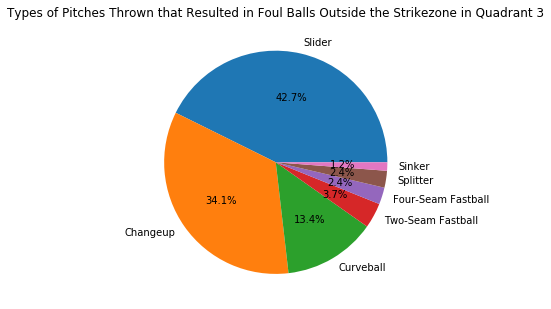

In [74]:
des33 = out_down5.pitch_type
des33 = des33.values

n33_sl = np.count_nonzero(des33=='SL')
n33_ft = np.count_nonzero(des33=='FT')
n33_ch = np.count_nonzero(des33=='CH')
n33_cu = np.count_nonzero(des33=='CU')
n33_si = np.count_nonzero(des33=='SI')
n33_ff = np.count_nonzero(des33=='FF')
n33_fs = np.count_nonzero(des33=='FS')

outcomes33 = pd.DataFrame([(n33_sl),(n33_ch),(n33_cu),(n33_ft),(n33_ff),(n33_fs),(n33_si)],
                        index=['Slider','Changeup','Curveball','Two-Seam Fastball','Four-Seam Fastball','Splitter','Sinker'],
                       columns=['Number'])

pie_labels33 = outcomes33.index
outcomes33['Number'].plot(kind='pie', labels = pie_labels33, figsize=(5,6), autopct = '%1.1f%%', startangle=0)
plt.axes().set_ylabel('')
plt.title('Types of Pitches Thrown that Resulted in Foul Balls Outside the Strikezone in Quadrant 3')

### The few pitches that were foulded off in quadrant 3 by Harper were sliders and fastballs

In [75]:
out_down7.pitch_type.unique()

array(['SL', 'CU', 'CH', 'SI', 'FF', 'FC'], dtype=object)

C:\Users\blync\anaconda3\lib\site-packages\ipykernel_launcher.py:18: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


Text(0.5, 1.0, 'Types of Pitches Thrown that Resulted in Balls Hit into Play Outside the Strikezone in Quadrant 3')

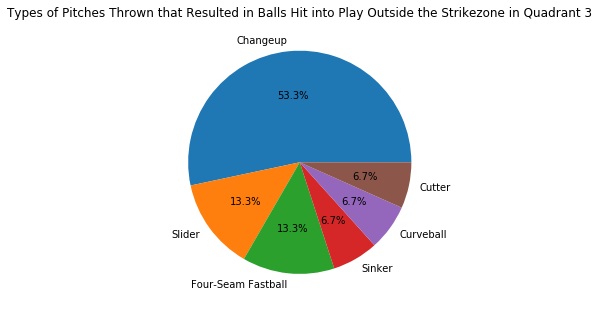

In [76]:
des34 = out_down7.pitch_type
des34 = des34.values

n34_sl = np.count_nonzero(des34=='SL')
n34_ff = np.count_nonzero(des34=='FF')
n34_si = np.count_nonzero(des34=='SI')
n34_cu = np.count_nonzero(des34=='CU')
n34_ch = np.count_nonzero(des34=='CH')
n34_fc = np.count_nonzero(des34=='FC')


outcomes34 = pd.DataFrame([(n34_ch),(n34_sl),(n34_ff),(n34_si),(n34_cu),(n34_fc)],
                        index=['Changeup','Slider','Four-Seam Fastball','Sinker','Curveball','Cutter'],
                       columns=['Number'])

pie_labels34 = outcomes34.index
outcomes34['Number'].plot(kind='pie', labels = pie_labels34, figsize=(5,6), autopct = '%1.1f%%', startangle=0)
plt.axes().set_ylabel('')
plt.title('Types of Pitches Thrown that Resulted in Balls Hit into Play Outside the Strikezone in Quadrant 3')

### The few pitches put into play by Harper in this zone were mostly offspeed pitches

In [77]:
in_down4.description.unique()

array(['swinging_strike', 'foul', 'swinging_strike_blocked',
       'hit_into_play', 'hit_into_play_score', 'hit_into_play_no_out'],
      dtype=object)

C:\Users\blync\anaconda3\lib\site-packages\ipykernel_launcher.py:17: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


Text(0.5, 1.0, 'Result of Pitches Thrown outside the Strikezone in Quadrant 4')

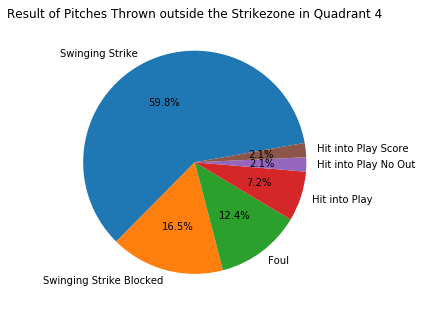

In [91]:
des40 = in_down4.description
des40 = des40.values

n40_ss = np.count_nonzero(des40=='swinging_strike')
n40_f = np.count_nonzero(des40=='foul')
n40_hip = np.count_nonzero(des40=='hit_into_play')
n40_hipno = np.count_nonzero(des40=='hit_into_play_no_out')
n40_ssb = np.count_nonzero(des40=='swinging_strike_blocked')
n40_hips = np.count_nonzero(des40=='hit_into_play_score')

outcomes40 = pd.DataFrame([(n40_ss),(n40_ssb),(n40_f),(n40_hip),(n40_hipno),(n40_hips)],
                        index=['Swinging Strike','Swinging Strike Blocked','Foul','Hit into Play','Hit into Play No Out','Hit into Play Score'],
                       columns=['Number'])

pie_labels40 = outcomes40.index
outcomes40['Number'].plot(kind='pie', labels = pie_labels41, figsize=(5,6), autopct = '%1.1f%%', startangle=10)
plt.axes().set_ylabel('')
plt.title('Result of Pitches Thrown outside the Strikezone in Quadrant 4')

In [79]:
in_down5 = in_down4.loc[in_down4['description'] == 'swinging_strike']
in_down6 = in_down4.loc[in_down4['description'] == 'foul']
in_down7 = in_down4.loc[in_down4['description'] == 'hit_into_play']

Text(0, 0.5, 'Y Coordinate')

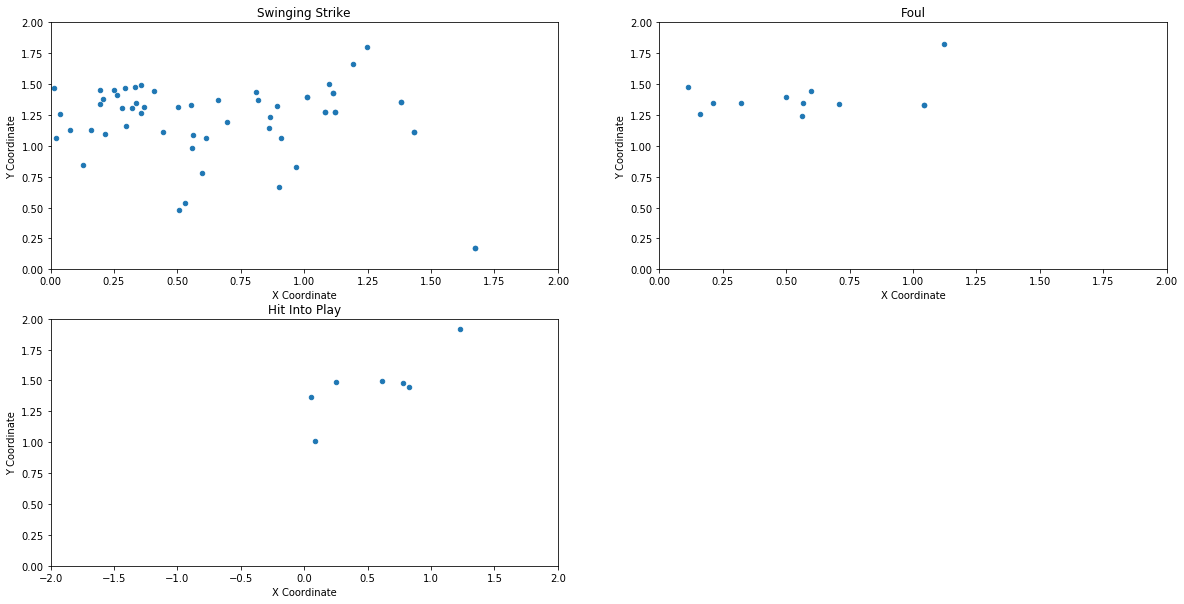

In [80]:
fig6 = plt.figure()

ax41 = fig6.add_subplot(2, 2, 1) # add subplot 1 (2 row, 2 columns, first plot)
ax42 = fig6.add_subplot(2, 2, 2)
ax43 = fig6.add_subplot(2, 2, 3)

in_down5.plot(kind='scatter', x='plate_x', y='plate_z', figsize=(20, 10), ax = ax41)
ax41.set_xlim([0, 2])
ax41.set_ylim([0, 2])
ax41.set_title('Swinging Strike')
ax41.set_xlabel('X Coordinate')
ax41.set_ylabel('Y Coordinate')
in_down6.plot(kind='scatter', x='plate_x', y='plate_z', figsize=(20, 10), ax = ax42)
ax42.set_xlim([0, 2])
ax42.set_ylim([0, 2])
ax42.set_title('Foul')
ax42.set_xlabel('X Coordinate')
ax42.set_ylabel('Y Coordinate')
in_down7.plot(kind='scatter', x='plate_x', y='plate_z', figsize=(20, 10), ax = ax43)
ax43.set_xlim([-2, 2])
ax43.set_ylim([0, 2])
ax43.set_title('Hit Into Play')
ax43.set_xlabel('X Coordinate')
ax43.set_ylabel('Y Coordinate')

In [81]:
in_down5.pitch_type.unique()

array(['CH', 'CU', 'SL', 'FT', 'KC', 'FS'], dtype=object)

C:\Users\blync\anaconda3\lib\site-packages\ipykernel_launcher.py:17: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


Text(0.5, 1.0, 'Types of Pitches Thrown that Resulted in Swinging Strikes Outside the Strikezone in Quadrant 4')

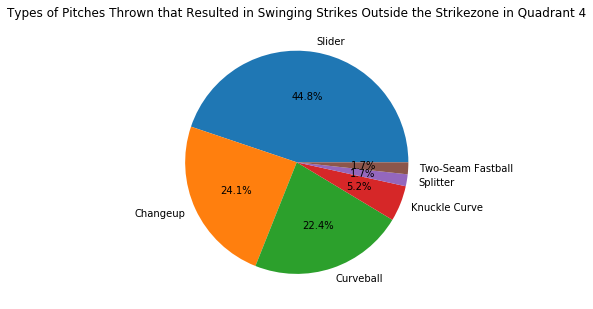

In [92]:
des41 = in_down5.pitch_type
des41 = des41.values

n41_sl = np.count_nonzero(des41=='SL')
n41_fs = np.count_nonzero(des41=='FS')
n41_cu = np.count_nonzero(des41=='CU')
n41_ch = np.count_nonzero(des41=='CH')
n41_ft = np.count_nonzero(des41=='FT')
n41_kc = np.count_nonzero(des41=='KC')

outcomes41 = pd.DataFrame([(n41_sl),(n41_ch),(n41_cu),(n41_kc),(n41_fs),(n41_ft)],
                        index=['Slider','Changeup','Curveball','Knuckle Curve','Splitter','Two-Seam Fastball'],
                       columns=['Number'])

pie_labels41 = outcomes41.index
outcomes41['Number'].plot(kind='pie', labels = pie_labels41, figsize=(5,6), autopct = '%1.1f%%', startangle=0)
plt.axes().set_ylabel('')
plt.title('Types of Pitches Thrown that Resulted in Swinging Strikes Outside the Strikezone in Quadrant 4')

### Swinging strikes in quadrant 4 were all pitches other than four-seam fastballs

In [83]:
in_down6.pitch_type.unique()

array(['SI', 'SL', 'CU', 'CH', 'FT', 'FS'], dtype=object)

C:\Users\blync\anaconda3\lib\site-packages\ipykernel_launcher.py:17: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


Text(0.5, 1.0, 'Types of Pitches Thrown that Resulted in Foul Balls Outside the Strikezone in Quadrant 4')

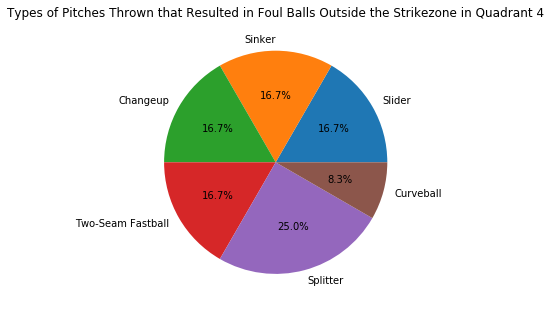

In [84]:
des42 = in_down6.pitch_type
des42 = des42.values

n42_sl = np.count_nonzero(des42=='SL')
n42_si = np.count_nonzero(des42=='SI')
n42_cu = np.count_nonzero(des42=='CU')
n42_ch = np.count_nonzero(des42=='CH')
n42_ft = np.count_nonzero(des42=='FT')
n42_fs = np.count_nonzero(des42=='FS')

outcomes42 = pd.DataFrame([(n42_sl),(n42_si),(n42_ch),(n42_ft),(n42_fs),(n42_cu)],
                        index=['Slider','Sinker','Changeup','Two-Seam Fastball','Splitter','Curveball'],
                       columns=['Number'])

pie_labels42 = outcomes42.index
outcomes42['Number'].plot(kind='pie', labels = pie_labels42, figsize=(5,6), autopct = '%1.1f%%', startangle=0)
plt.axes().set_ylabel('')
plt.title('Types of Pitches Thrown that Resulted in Foul Balls Outside the Strikezone in Quadrant 4')

### There were very few pitches thrown in this quadrant that resulted in a foulball, but all of the pitches varied greatly

### Conclusions:
#### -Harper overall has great discipline at the plate
#### -Ball swung at outside the strikezone are mostly thrown in quadrant 3 (down and away)
#### -The most common pitch thrown above the strikezone to Harper is a four-seam fastballs between 92-96 mph
#### -Most pitches that Harper swings at outside the strike zone are either fouled off or swinging strikes.  
#### -Harper struggles to get hits off of any pitch outside the strikezone.  Less than 10% of the pitches he swung at in any quadrant were put into play for hits